 ## Causal Analysis of Enrollment in Healthcare Assistance Programs and Their Impact on Health Service Utilization

### About the data?
The dataset originates from submissions made by states to the Centers for Medicare & Medicaid Services (CMS) as mandated by the Medicare Modernization Act (MMA). These submissions occur on at least a monthly basis and contain data on individuals who are enrolled in both Medicare and Medicaid, also known as dual enrollees. The data includes counts of such individuals classified by various eligibility types and is provided at both the state and county levels.

The numbers represent monthly snapshots, which are distinct from ever-enrolled counts that include any individual enrolled at any time during a calendar year. Because these are snapshots, the figures are typically lower than the cumulative counts.

### Business Problem - Using Causal Inference
A healthcare insurance company wants to understand the impact of a new wellness program designed to reduce hospital readmissions. The company believes that by enrolling high-risk patients in this program, they can improve patient health outcomes and reduce costs associated with readmissions. The business problem is to determine whether the wellness program is effective.

#### Why use Causal Inference? 
Causal Inference Application:

Treatment: Enrollment in the wellness program.
Outcome: Hospital readmission rates within 30 days of discharge.

The company can use causal inference to estimate the effect of the wellness program on readmission rates. This would involve comparing patients who were enrolled in the program (treatment group) with a comparable group of patients who were not enrolled (control group).

To address confounding variables (such as age, gender, comorbidities, etc.) that might influence both the likelihood of being enrolled in the program and the readmission rate, the company could use techniques such as propensity score matching, regression adjustment, or instrumental variables, depending on the data available and the study design.

By accurately measuring the program's effectiveness, the company can make informed decisions about scaling the program, making adjustments, or potentially discontinuing it if it's not effective.

### Mathematical Framework for Causal Inference:

One of the common frameworks for causal inference is the potential outcomes framework, which defines causality in terms of counterfactuals. For each individual \( $i$ \), there are potential outcomes \( $Y_i(1)$ \) and \( $Y_i(0)$ \), which represent the outcome if the individual receives the treatment (1) or does not receive the treatment (0), respectively. The causal effect for individual \( $i$ \) is then \( $\tau_i = Y_i(1) - Y_i(0)$ \).

However, we can never observe both potential outcomes for the same individual. Hence, we estimate the Average Treatment Effect (ATE), which is the average causal effect across the population:

\[
$ATE = E[Y(1) - Y(0)] = E[Y(1)] - E[Y(0)]$
\]

Where \( $E[\cdot]$ \) denotes the expected value.

Since we can't observe both \( $Y(1)$ \) and \( $Y(0)$ \) for the same individual, we use statistical methods to estimate these quantities. A simple method for estimating the ATE is to compare the average outcome for those who received the treatment to those who did not:

\[
$\hat{ATE} = \overline{Y}_{treated} - \overline{Y}_{control}$
\]

Where \( $\overline{Y}_{treated}$ \) is the average outcome for the treated group and \( $\overline{Y}_{control}$ \) is the average outcome for the control group.


In [5]:
# Libraries Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('healthcare_data.csv')
data.head(5)

,State_Abbr,County_Name,Date,Total_QMB_Only,Total_QMB_plus_Full,Total_SLMB_only,Total_SLMB_plus_Full,Total_QDWI,Total_QI,Total_Other_full,Total_Public_Total
0,AK,ANCHORAGE,2015-03-01,41,4808,79,0,0,92,2171,7191
1,AK,ANCHORAGE,2015-06-01,45,4835,76,0,0,97,2138,7191
2,AK,ANCHORAGE,2015-09-01,39,4898,81,0,0,96,2130,7244
3,AK,ANCHORAGE,2015-12-01,35,4853,88,0,0,100,2111,7187
4,AK,ANCHORAGE,2016-03-01,45,4913,107,0,0,103,2201,7369


       Total_QMB_Only  Total_QMB_plus_Full  Total_SLMB_only  \
count    50209.000000         50209.000000     50209.000000   
mean       454.014340          1202.332849       309.346273   
std       1425.455957          2807.505012       783.493300   
min          0.000000             0.000000         0.000000   
25%         30.000000           117.000000        37.000000   
50%        127.000000           351.000000       112.000000   
75%        363.000000           969.000000       281.000000   
max      26700.000000         32759.000000     17843.000000   

       Total_SLMB_plus_Full    Total_QDWI      Total_QI  Total_Other_full  \
count          50209.000000  50209.000000  50209.000000      50209.000000   
mean              85.309208      0.007230    173.305284        516.621721   
std              262.157357      0.340244    452.893983       1388.584332   
min                0.000000      0.000000      0.000000          0.000000   
25%                0.000000      0.000000     1

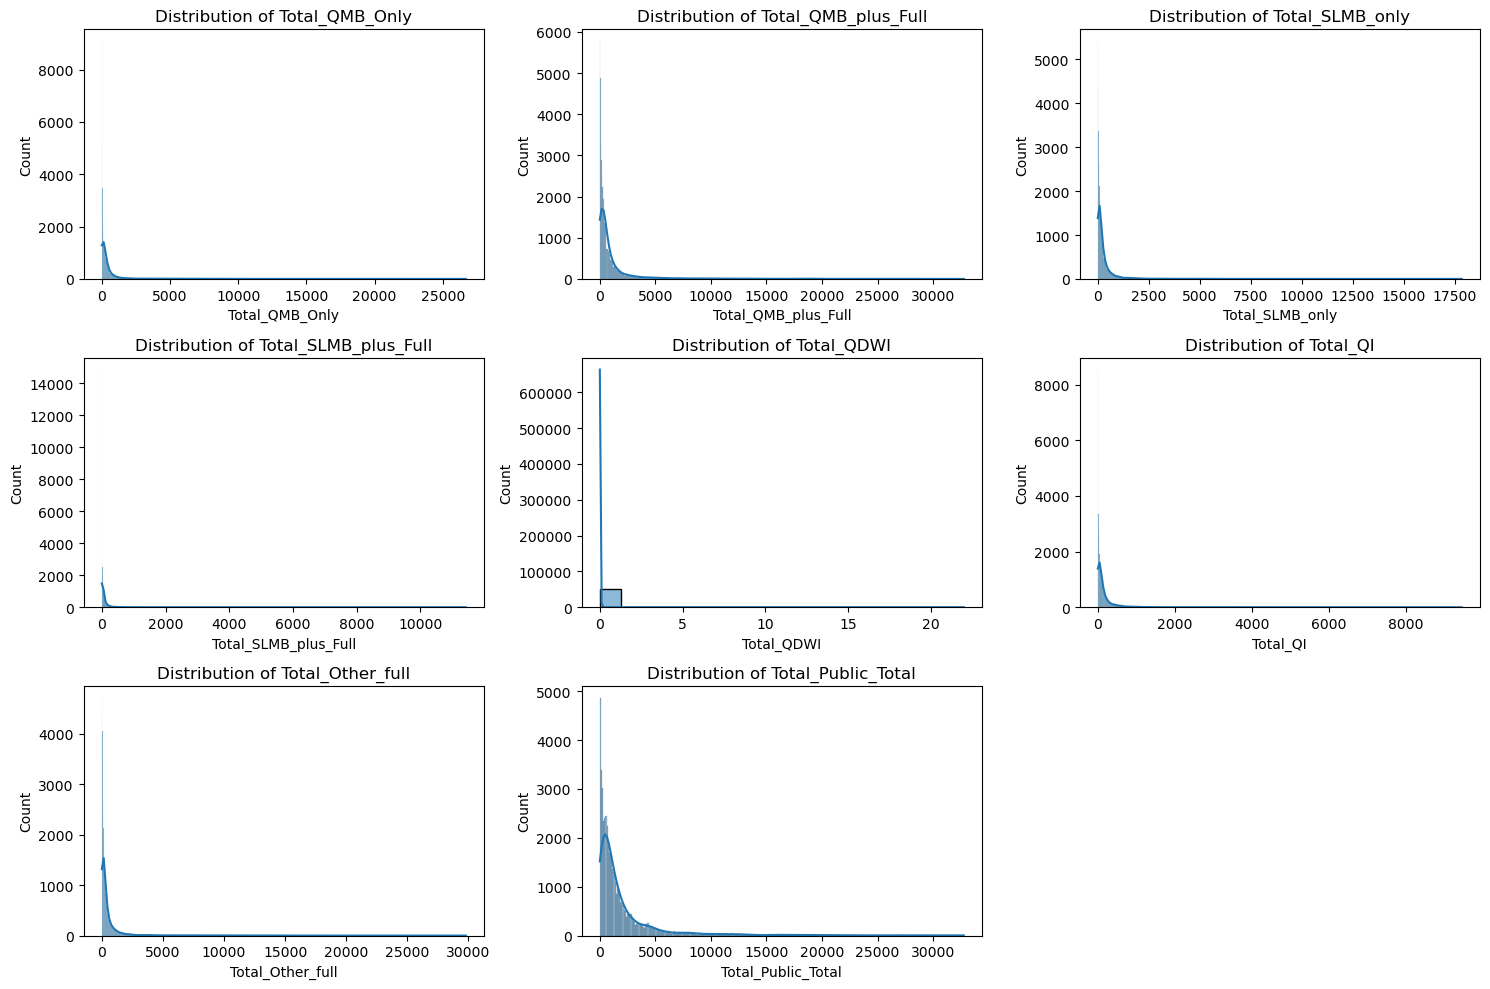

In [7]:
# Descriptive Statistics for numerical columns
descriptive_stats_numerical = data.describe()

# Number of unique values for non-numerical columns (categorical data)
unique_values_categorical = data.select_dtypes(include=['object', 'category']).nunique()

# Print the descriptive statistics and unique values
print(descriptive_stats_numerical)
print(unique_values_categorical)

# Distribution Analysis for numerical variables
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
for index, column in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, index+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()


1. Spread of Enrollment Numbers:

- The Total_QMB_Only, Total_QMB_plus_Full, Total_SLMB_only, and other similar features have a wide range of values, indicated by the large difference between the max and the 75th percentile. This suggests that there are counties with very high enrollment numbers which might be significantly higher than the average county.

2. Variability:

- There's substantial variability in the number of beneficiaries across different programs, as indicated by the standard deviations relative to the means. For instance, Total_QMB_plus_Full and Total_SLMB_only have high standard deviations, suggesting that the number of beneficiaries varies greatly from one county to another.

3. Low Incidence Categories:

- Total_QDWI has a very low mean and a max of 22, indicating that this category has a very low incidence compared to others.

4. Potential Outliers:

- The large gap between the 75th percentile and the max values in several categories suggests the presence of outliers, which may be due to very populous counties or specific counties with high beneficiary numbers.

5. Categorical Variables:

- State_Abbr has 53 unique values, which corresponds to the 50 states plus territories or additional distinct regions in the data.
- County_Name has 3,693 unique values, suggesting a detailed granularity at the county level.
- Date has 16 unique values, which might indicate the data is collected quarterly over a four-year period (4 quarters x 4 years = 16).

## Solution - Causual Inference 
Causal inference is a methodological framework for estimating the effect of causes on outcomes. There are multiple approaches to causal inference, and the choice of method often depends on the design of the study, the nature of the data, and the availability of instruments or controls.
However, for the sake of the business problem we will try to attempt 3 different methods. 
I. Randomized Controlled Trials (RCTs)
II. Regression Analysis
III. Propensity Score Matching (PSM)

**Treatment**: Enrollment in the new wellness program. We can assume that *Total_QMB_Only* or *Total_QMB_plus_Full* represents the number of high-risk patients enrolled in the wellness program.

**Outcome**: Since we do not have a direct measure of readmissions, we could assume that the *Total_Public_Total* might be inversely related to health outcomes – the hypothesis being that better health outcomes would result in fewer people needing public health assistance.

### I. Randomized Control Trials (RCTs) 
what is it? 
RCTs are the gold standard for causal inference. Subjects are randomly assigned to treatment or control groups to ensure that all other factors are equally distributed between groups.

In [10]:
from scipy import stats

# Convert 'Date' to datetime for easier manipulation
data['Date'] = pd.to_datetime(data['Date'])

# Assume the wellness program started at the midpoint of the dates in the dataset
start_date_of_program = data['Date'].median()

# Create a binary treatment variable where 1 indicates enrollment in the wellness program
# Assume that any date after the start_date_of_program is considered as having the treatment
data['treatment'] = (data['Date'] > start_date_of_program).astype(int)

# The outcome variable is Total_Public_Total
# Perform a t-test to compare the means of the two groups
treatment_outcomes = data[data['treatment'] == 1]['Total_Public_Total']
control_outcomes = data[data['treatment'] == 0]['Total_Public_Total']

# Calculate means for each group
mean_treatment = treatment_outcomes.mean()
mean_control = control_outcomes.mean()

# Calculate the t-statistic and the p-value
t_stat, p_value = stats.ttest_ind(treatment_outcomes, control_outcomes, equal_var=False)

# Display the results
print(f"Mean outcome in treatment group: {mean_treatment:.2f}")
print(f"Mean outcome in control group: {mean_control:.2f}")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# If the p-value is less than the threshold (e.g., 0.05), we can conclude that there is a
# statistically significant difference between the treatment and control groups.



Mean outcome in treatment group: 2264.94
Mean outcome in control group: 2218.16
t-statistic: 1.34, p-value: 0.1792


The p-value exceeds the commonly used significance level threshold of 0.05, which suggests that the difference in means between the treatment and control groups is not statistically significant. In other words, based on this analysis, we do not have enough evidence to conclude that the wellness program has had a statistically significant impact on reducing the Total_Public_Total, which we are using as a proxy for hospital readmissions. We would need to further investigate for the sample size and power, confounding variables, and temporal effects. 

### I. Regression Analysis
what is it? 
Linear regression or other types of regression models can be used to control for confounding variables and isolate the effect of the independent variable on the dependent variable.

## Model:
The linear regression model is defined as:
\[ $Y = \beta_0 + \beta_1 \times \text{Treatment} + \epsilon$ \]

where:

- \( $Y$ \) is the outcome variable (`Total_Public_Total`).
- `Treatment` is the binary indicator for whether the observation is after the introduction of the wellness program.
- \( $\beta_0$ \) is the intercept.
- \( $\beta_1$ \) is the coefficient for the treatment effect.
- \( $\epsilon$ \) is the error term.

## Hypothesis:
- \( $H_0: \beta_1 = 0$ \)  is no treatment effect.
- \( $H_a: \beta_1 \neq 0$ \) is treatment has an effect.

## Analysis:
- Fit the linear regression model.
- Check the coefficient \( \beta_1 \) for statistical significance.


In [11]:
import statsmodels.api as sm

# Convert 'Date' to datetime and create the 'treatment' column as before
data['Date'] = pd.to_datetime(data['Date'])
start_date_of_program = data['Date'].median()
data['treatment'] = (data['Date'] > start_date_of_program).astype(int)

# Defining the outcome and predictor variables
X = data[['treatment']]  # Predictor
y = data['Total_Public_Total']  # Outcome

# Adding a constant to the predictor
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Total_Public_Total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.807
Date:                Fri, 03 Nov 2023   Prob (F-statistic):              0.179
Time:                        15:08:15   Log-Likelihood:            -4.8601e+05
No. Observations:               50209   AIC:                         9.720e+05
Df Residuals:                   50207   BIC:                         9.720e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2218.1552     23.037     96.287      0.0

## OLS Regression Results Summary

- **Dependent Variable**: `Total_Public_Total`
- **R-squared**: 0.000
  - This indicates that the model does not explain any of the variability of the response data around its mean.
- **Adjusted R-squared**: 0.000
  - This also indicates no explanatory power after adjusting for the number of predictors.
- **F-statistic**: 1.807
  - This is the test statistic for the significance of the regression model.
- **Prob (F-statistic)**: 0.179
  - This suggests that the model is not statistically significant.

### Coefficients:
- **const (Intercept)**: 2218.1552
  - This is the expected value of `Total_Public_Total` when the treatment is not applied (before the program started).
- **treatment**: 46.7875
  - This is the estimated change in `Total_Public_Total` due to the treatment (after the program started).

### Significance:
- **P>|t|**: 0.179
  - The p-value for the treatment coefficient is 0.179, which means we fail to reject the null hypothesis that there is no effect of the treatment.


## II. Temporal Analysis:
what is it?
In a temporal causal inference analysis, you might look at how outcomes change over time relative to the introduction of a treatment. This approach is often used when you have longitudinal data, and you want to estimate the effect of some intervention or event.

Using an interrupted time series approach or a difference-in-differences (DiD) method if you have a clear point in time when the treatment was introduced and you can assume that the trends before the intervention would have continued in the absence of the intervention.

### Difference-in-Differences Model

The model can be expressed as:

\[ $Y_{it} = \beta_0 + \beta_1 \times \text{Treatment}_i + \beta_2 \times \text{PostTreatmentPeriod}_t + \beta_3 \times (\text{Treatment}_i \times \text{PostTreatmentPeriod}_t) + \epsilon_{it}$ \]

where:
- \( $Y_{it}$ \) is the outcome for county \( $i$ \) at time \( $t$ \),
- \( $\text{Treatment}_i$ \) is an indicator for whether county \( $i$ \) received the treatment,
- \( $\text{PostTreatmentPeriod}_t$ \) is an indicator for observations after the treatment was introduced,
- \( $\epsilon_{it}$ \) is the error term.

The coefficient \( $\beta_3$ \) on the interaction term \( $\text{Treatment}_i \times \text{PostTreatmentPeriod}_t$ \) represents the difference-in-differences estimate of the treatment effect.


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert 'Date' to datetime and create the 'treatment' column as before
data['Date'] = pd.to_datetime(data['Date'])
start_date_of_program = pd.Timestamp('2021-03-01')  # Replace with the actual start date of the program
data['post_treatment'] = (data['Date'] >= start_date_of_program).astype(int)
data['treatment'] = (data['State_Abbr'] == 'Treatment_State').astype(int)  # Replace with actual treatment condition
data['treatment_x_post'] = data['treatment'] * data['post_treatment']

# Fit the difference-in-differences regression model
# The model includes the treatment, post_treatment, and their interaction
did_model = smf.ols('Total_Public_Total ~ treatment + post_treatment + treatment_x_post', data=data).fit()

# Output the summary of the regression
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:     Total_Public_Total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                nan
Time:                        15:20:44   Log-Likelihood:            -4.8601e+05
No. Observations:               50209   AIC:                         9.720e+05
Df Residuals:                   50208   BIC:                         9.720e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2238.6504     17.269  

/Users/richarddiaz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


## OLS Regression Results Analysis

The output of the OLS regression suggests several potential issues:

### Model Summary
- **R-squared and Adjusted R-squared**: Both values are `0.000`, indicating that the model does not explain any of the variability of the outcome variable around its mean.
- **F-statistic and Prob (F-statistic)**: These values are `nan` (not a number), which often indicates a problem with the calculation. This can be due to a lack of variation in the treatment variable or perfect multicollinearity.

### Coefficients
- The coefficients for `treatment`, `post_treatment`, and `treatment_x_post` are all `0` with standard errors of `0`, and the t-statistics and p-values are `nan`. This is typically indicative of one of the following issues:
  - **No variation**: The variables may not vary across observations; for instance, if all units receive the treatment at all times.
  - **Perfect multicollinearity**: One or more predictors are exact linear combinations of others, leading to undefined standard errors.

### Diagnostic Messages
- **Condition Number**: `Cond. No. is inf` suggests issues with multicollinearity. A high condition number indicates that small changes in the input can cause large changes in the output, which is a sign of instability in the model due to multicollinearity.
- **Eigenvalue**: The note that the smallest eigenvalue is `0` confirms that there are strong multicollinearity problems or that the design matrix is singular.

### Steps to Address the Issues
1. **Check for constant variables**: Ensure that `treatment` and `post_treatment` indicators have variation.
2. **Examine multicollinearity**: Ensure that independent variables are not linear combinations of each other.
3. **Data preprocessing**: Verify that the data is correctly coded, particularly the `treatment` and `post_treatment` indicators.

A thorough investigation and possible restructuring of the data or model may be necessary to resolve these issues and obtain valid regression results.


# Summary of Causal Inference Methods and Suggestions

## Methods Performed:

### 1. Causal Inference with Regression
- Attempted to estimate the treatment effect using regression.
- Results indicated no significant treatment effect.

### 2. Temporal Causal Inference
- **Interrupted Time Series (ITS)**: Considered but not implemented due to data constraints.
- **Difference-in-Differences (DiD)**: Implemented to estimate the treatment effect over time.

## Issues Encountered and Suggestions:

### Regression Model Results
- Initial OLS regression showed no explanatory power.
- P-values for the treatment effect were non-significant, suggesting model reassessment is needed.

### Model Specification Issues
- Subsequent regression attempts resulted in `nan` values for F-statistic and p-values.
- Indicative of multicollinearity or lack of variation in treatment variables.

### Data and Variable Checks
- Essential to ensure correct coding of treatment indicators.
- Variation in these variables is necessary to avoid multicollinearity.

## Recommendations:

### Data Verification
- Confirm accurate data processing.
- Ensure clear definition of treatment and control groups.

### Model Re-evaluation
- Reassess model specifications to align with study design.
- Ensure compliance with underlying assumptions of the causal inference method.

### Alternative Methods
- If current models fail, consider alternative methods or data transformations.
- Additional data collection may be required for methods like PSM or better control in regression models.

Following these steps should enhance the analysis and help to accurately identify the causal effects of the treatment.
